In [21]:
import time
import requests
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd

from selenium import webdriver
from matplotlib import rc
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [22]:
options = webdriver.ChromeOptions()
options.add_experimental_option('excludeSwitches', ['enable-logging'])
wd = webdriver.Chrome('./chromedriver.exe', options=options)

C:\Users\admin\AppData\Local\Temp\ipykernel_15920\2950996752.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome('./chromedriver.exe', options=options)


In [23]:
star_url = 'https://www.starbucks.co.kr/store/store_map.do'
wd.get(star_url)

In [24]:
# selenium 4 버전으로 변경되면서 함수 원형 자체가 수정됨
# 새 패키지 추가
from selenium.webdriver.common.by import By

In [26]:
# TIP !!
# 경로 찾아가서 해당 버튼 클릭하라는 코드
# 4버전으로 바뀌면서 코드도 바꿈
# wd.find_element_by_xpath('//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
wd.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
time.sleep(2)
# 서울 선택
wd.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]/a').click()
time.sleep(2)
# 서울 중 젤 첫번째꺼 선택 (전체)
wd.find_element(By.XPATH, '//*[@id="mCSB_2_container"]/ul/li[1]/a').click()

In [27]:
req = wd.page_source
soup = BeautifulSoup(req, "html.parser")
info = soup.find("div", id = "mCSB_3_container").find_all("li", class_ = 'quickResultLstCon')
len(info), info[0]

(588,
 <li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>)

In [28]:
name = info[0].find("strong").text.strip()
address = info[0].find(class_="result_details").text.strip()[:-9]
place = address.split(" ")[1]

name, address, place

('역삼아레나빌딩', '서울특별시 강남구 언주로 425 (역삼동)', '강남구')

In [29]:
star_info = []
for item in info :
    name = item.find("strong").text.strip()
    address = item.find(class_="result_details").text.strip()[:-9]
    place = address.split(" ")[1]
   
    data = {
        "가게명" : name,
        "주소" : address,
        "구" : place
    }
    star_info.append(data)
len(star_info)

588

In [30]:
df_star = pd.DataFrame(star_info, columns = ['가게명', '구', '주소'])
df_star.tail()

,가게명,구,주소
583,중랑구청,중랑구,서울특별시 중랑구 신내로 72
584,사가정역,중랑구,서울특별시 중랑구 면목로 310
585,상봉역,중랑구,서울특별시 중랑구 망우로 307 (상봉동)
586,묵동,중랑구,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층"
587,중화역,중랑구,서울특별시 중랑구 봉화산로 35


In [31]:
gu_list = list(set(df_star["구"]))
gu_list

['구로구',
 '중구',
 '성동구',
 '성북구',
 '동대문구',
 '종로구',
 '강북구',
 '동작구',
 '영등포구',
 '강서구',
 '중랑구',
 '관악구',
 '송파구',
 '도봉구',
 '서초구',
 '금천구',
 '은평구',
 '강남구',
 '노원구',
 '양천구',
 '광진구',
 '용산구',
 '강동구',
 '서대문구',
 '마포구']

In [32]:
# wd는 스벅 닫히고 이디야 열리는거고 drive로 하면 둘다 따로 열림
edi_url = "https://www.ediya.com/contents/find_store.html"
drive = webdriver.Chrome("./chromedriver.exe", options=options)
drive.get(edi_url)

C:\Users\admin\AppData\Local\Temp\ipykernel_15920\1541193506.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  drive = webdriver.Chrome("./chromedriver.exe", options=options)


In [33]:
edi_info = []



for gu in gu_list:
    drive.find_element(By.XPATH, '//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
    drive.find_element(By.XPATH, '//*[@id="keyword"]').clear
    drive.find_element(By.XPATH, '//*[@id="keyword"]').send_keys("서울 " + gu)
    drive.find_element(By.XPATH, '//*[@id="keyword_div"]/form/button').click()
    
    html = drive.page_source
    soup = BeautifulSoup(html, "html.parser")
    
    info = soup.find("ul", id = "placesList").find_all("li", class_='item')
    
    for item in info:
        name = item.find("dt").text
        address = item.find("dd").text.strip()
        place = address.split(" ")[1]
        

        data = {
            "가게명" : name,
            "구" : place,
            "주소" : address,
        }
        edi_info.append(data)
 
len(edi_info)

666

In [34]:
df_edi = pd.DataFrame(edi_info)
df_edi.tail()

,가게명,구,주소
661,천호로데오점,강동구,서울 강동구 천호대로 1027 (천호동)
662,천호역점,강동구,서울 강동구 천호대로 1006 (성내동)
663,천호중앙점,강동구,"서울 강동구 올림픽로 660 (천호동, 천호엘크루주상복합)"
664,천호초교사거리점,강동구,"서울 강동구 구천면로 304 (천호동, 일주빌딩)"
665,천호현대점,강동구,서울 강동구 올림픽로 665 (천호동)


In [35]:
star_count = []
for item in gu_list:
    n = len(df_star.loc[df_star['구']==item])
    data = {
        "구" : item,
        "스벅 매장수" : n
    }
    star_count.append(data)
df_star_count = pd.DataFrame(star_count)
df_star_count

,구,스벅 매장수
0,구로구,12
1,중구,53
2,성동구,13
3,성북구,15
4,동대문구,9
5,종로구,39
6,강북구,6
7,동작구,11
8,영등포구,41
9,강서구,26


In [36]:
edi_count = []
for item in gu_list:
    n = len(df_edi.loc[df_edi['구']==item])
    data = {
        "구" : item,
        "이디야 매장수" : n
    }
    edi_count.append(data)
df_edi_count = pd.DataFrame(edi_count)
df_edi_count

,구,이디야 매장수
0,구로구,0
1,중구,6
2,성동구,23
3,성북구,64
4,동대문구,0
5,종로구,62
6,강북구,0
7,동작구,22
8,영등포구,41
9,강서구,45


In [37]:
sum_data = pd.merge(df_edi_count, df_star_count)
sum_data["매장 수 차이"] = sum_data["이디야 매장수"] - sum_data["스벅 매장수"]
sum_data

,구,이디야 매장수,스벅 매장수,매장 수 차이
0,구로구,0,12,-12
1,중구,6,53,-47
2,성동구,23,13,10
3,성북구,64,15,49
4,동대문구,0,9,-9
5,종로구,62,39,23
6,강북구,0,6,-6
7,동작구,22,11,11
8,영등포구,41,41,0
9,강서구,45,26,19


In [17]:
# 이거 안돼서 맑은고딕으로 했음
from matplotlib import rc
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = './NanumGothic.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

C:\Users\admin\AppData\Local\Temp\ipykernel_15920\3681494351.py:4: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


In [19]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Sans Mono',
 'cmex10',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Serif Display',
 'cmtt10',
 'cmss10',
 'STIXSizeOneSym',
 'STIXSizeFiveSym',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'cmsy10',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'cmmi10',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'DejaVu Serif',
 'cmr10',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'DejaVu Sans Display',
 'cmb10',
 'STIXSizeFourSym',
 'HYPost-Light',
 'Segoe UI',
 'Georgia',
 'Cambria',
 'Palatino Linotype',
 'Palace Script MT',
 'Times New Roman',
 'Segoe UI Emoji',
 'Candara',
 'MoeumT R',
 'OCR A Extended',
 'Sitka Small',
 'Bodoni MT',
 'Californian FB',
 'Candara',
 'Century Schoolbook',
 'Trebuchet MS',
 'Bookman Old Style',
 'Chiller',
 'Bodoni MT',
 'Book Antiqu

In [42]:
# 음수 마이너스 표시가 안나올 때
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

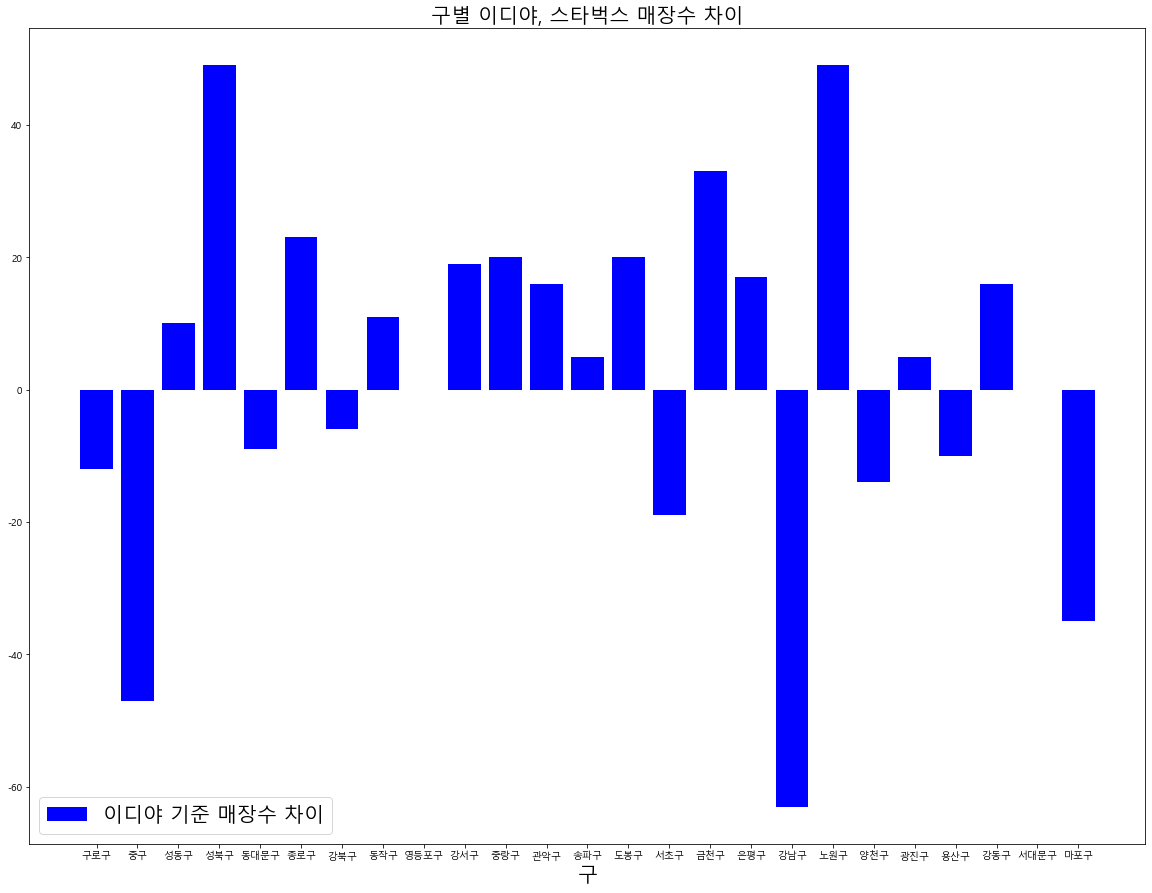

In [43]:
a = sum_data["매장 수 차이"]
y = "ediya"

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(20,15))
plt.bar(sum_data["구"], a, color = 'b', label ="이디야 기준 매장수 차이" )
plt.title("구별 이디야, 스타벅스 매장수 차이", fontsize = 20)
plt.xlabel("구", fontsize = 20)
plt.legend(loc ='lower left', fontsize = 20)
plt.show()